# House Prices - Advanced Regression Techniques
[Kaggle Competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
df_house = pd.read_csv('../data/train.csv', index_col=0)
df_house_test = pd.read_csv('../data/test.csv', index_col=0)
df_all = pd.concat((df_house.iloc[:, :-1], df_house_test))

In [8]:
y = df_house['SalePrice']

In [9]:
df_house.shape, df_house_test.shape, df_all.shape

((1460, 80), (1459, 79), (2919, 79))

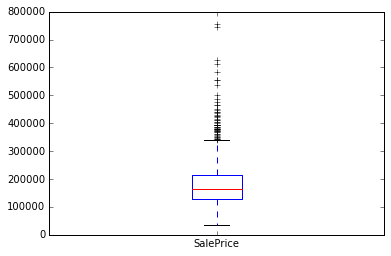

In [10]:
df_house['SalePrice'].plot.box();

In [11]:
df_all_dummy = pd.get_dummies(df_all, drop_first=True)

In [12]:
X = df_all_dummy.iloc[:len(y), :]
X = X.fillna(X.mean().round())

X_test = df_all_dummy.iloc[len(y):, :]
X_test = X_test.fillna(X.mean().round())

# Ridge Regression

In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()

In [39]:
ridge_reg.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [40]:
# error on training
np.sqrt(np.mean((np.log(ridge_reg.predict(X)) - np.log(y)) ** 2))

0.12127485227319587

In [30]:
Id = df_all.index.values[len(y):]

In [41]:
y_test = ridge_reg.predict(X_test)
submission = pd.DataFrame(data={'Id':Id, 'SalePrice':y_test})
submission.to_csv('../data/submissions/submission1.csv', index=False)

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
rf = RandomForestRegressor(n_estimators=200)

In [35]:
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [36]:
# error on training
np.sqrt(np.mean((np.log(rf.predict(X)) - np.log(y)) ** 2))

0.059176371300009641

In [37]:
y_test = rf.predict(X_test)
submission = pd.DataFrame(data={'Id':Id, 'SalePrice':y_test})
submission.to_csv('../data/submissions/submission2.csv', index=False)

# Grid Search

In [14]:
from sklearn.grid_search import GridSearchCV

In [ ]:
rf = RandomForestRegressor()

In [105]:
parameters = {'max_features':['auto'], 'n_estimators':[1000], 
             'min_samples_split':[2], 'max_depth': [5, 7, 10, 15] }
clf = GridSearchCV(rf, parameters, n_jobs=-1)
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [5, 7, 10, 15], 'n_estimators': [1000], 'min_samples_split': [2], 'max_features': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [106]:
clf.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 1000}

In [117]:
rf.max_depth

In [107]:
y_test = clf.predict(X_test)
submission = pd.DataFrame(data={'Id':Id, 'SalePrice':y_test})
submission.to_csv('../data/submissions/submission4.csv', index=False)

In [114]:
mod1 = pd.read_csv('../data/submissions/submission1.csv', index_col='Id')
mod2 = pd.read_csv('../data/submissions/submission2.csv', index_col='Id')
mod3 = pd.read_csv('../data/submissions/submission3.csv', index_col='Id')
mod4 = pd.read_csv('../data/submissions/submission4.csv', index_col='Id')

In [115]:
df_sub = pd.concat((mod1, mod2, mod3, mod4), axis=1)

# Extremely Random Trees

In [124]:
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier

In [125]:
erf = ExtraTreesRegressor(n_estimators=1000)

In [126]:
erf.fit(X, y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [149]:
# error on training
np.sqrt(np.mean((np.log(erf.predict(X)) - np.log(y)) ** 2))

0.0

In [166]:
y_test = erf.predict(X_test)
submission = pd.DataFrame(data={'Id':Id, 'SalePrice':y_test})
submission.to_csv('../data/submissions/submission4.csv', index=False)

In [129]:
mod1 = pd.read_csv('../data/submissions/submission1.csv', index_col='Id')
mod2 = pd.read_csv('../data/submissions/submission2.csv', index_col='Id')
mod3 = pd.read_csv('../data/submissions/submission3.csv', index_col='Id')
mod4 = pd.read_csv('../data/submissions/submission4.csv', index_col='Id')
df_sub = pd.concat((mod1, mod2, mod3, mod4), axis=1)

In [141]:
df_sub_all = df_sub.mean(axis=1).reset_index()
df_sub_all.columns = ['Id', 'SalePrice']

In [143]:
df_sub_all.to_csv('../data/submissions/submission5.csv', index=False)

# Gradient Boosted Trees

In [3]:
from sklearn.ensemble import GradientBoostingRegressor

In [163]:
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=500)

In [164]:
gbr.fit(X, y)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=2, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=500,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [165]:
# error on training
np.sqrt(np.mean((np.log(gbr.predict(X)) - np.log(y)) ** 2))

0.080007139065524438

In [167]:
y_test = gbr.predict(X_test)
submission = pd.DataFrame(data={'Id':Id, 'SalePrice':y_test})
submission.to_csv('../data/submissions/submission4.csv', index=False)

# Grid Search Gradient Boosted Trees

In [15]:
gbr = GradientBoostingRegressor()

In [27]:
parameters = {'max_features':['auto'], 'n_estimators':[1000, 1500, 2000],
             'learning_rate':[.02, .035, .05, .07], 'max_depth': [2, 3]}
clf = GridSearchCV(gbr, parameters, n_jobs=-1)
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.02, 0.035, 0.05, 0.07], 'n_estimators': [1000, 1500, 2000], 'max_depth': [2, 3], 'max_features': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [28]:
clf.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'max_features': 'auto',
 'n_estimators': 1500}

In [32]:
y_test = clf.predict(X_test)
submission = pd.DataFrame(data={'Id':Id, 'SalePrice':y_test})
submission.to_csv('../data/submissions/submission6.csv', index=False)

In [43]:
mod1 = pd.read_csv('../data/submissions/submission1.csv', index_col='Id')
mod2 = pd.read_csv('../data/submissions/submission2.csv', index_col='Id')
mod3 = pd.read_csv('../data/submissions/submission6.csv', index_col='Id')
df_sub = pd.concat((mod1, mod2, mod3), axis=1)

In [ ]:
#

In [53]:
df_sub.head()

,SalePrice,SalePrice,SalePrice
Id,,,
1461,102120.837881,128033.790,117314.582367
1462,141691.909139,155036.125,163944.388751
1463,177025.799781,179423.595,187223.885403
1464,189096.128166,181274.450,192296.324278
1465,211264.145756,197216.120,192676.481960


In [50]:
np.sqrt(np.mean((np.log(clf.predict(X)) - np.log(y)) ** 2))

0.069271874288456076

In [51]:
parameters = {'max_features':[.3, .4, .5, .6, .7, .8, .9, .99], 'n_estimators':[1000, 1500, 2000],
             'learning_rate':[.03, .04, .05, .06, .07], 'max_depth': [2, 3]}
clf = GridSearchCV(gbr, parameters, n_jobs=-1)
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.03, 0.04, 0.05, 0.06, 0.07], 'n_estimators': [1000, 1500, 2000], 'max_depth': [2, 3], 'max_features': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [52]:
clf.best_params_

{'learning_rate': 0.06,
 'max_depth': 2,
 'max_features': 0.6,
 'n_estimators': 1000}

In [54]:
gbr = GradientBoostingRegressor(learning_rate=.06, max_depth=2, max_features=.6, n_estimators=1000)

In [55]:
gbr.fit(X, y)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.06, loss='ls',
             max_depth=2, max_features=0.6, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [56]:
np.sqrt(np.mean((np.log(clf.predict(X)) - np.log(y)) ** 2))

0.076461756300438263

In [57]:
np.sqrt(np.mean((np.log(gbr.predict(X)) - np.log(y)) ** 2))

0.075974241950191063

In [58]:
y_test = gbr.predict(X_test)
submission = pd.DataFrame(data={'Id':Id, 'SalePrice':y_test})
submission.to_csv('../data/submissions/submission6.csv', index=False)

In [59]:
mod1 = pd.read_csv('../data/submissions/submission1.csv', index_col='Id')
mod2 = pd.read_csv('../data/submissions/submission2.csv', index_col='Id')
mod3 = pd.read_csv('../data/submissions/submission6.csv', index_col='Id')
df_sub = pd.concat((mod1, mod2, mod3), axis=1)

In [64]:
df_sub_med = df_sub.median(axis=1).reset_index()
df_sub_med.columns = ['Id', 'SalePrice']
df_sub_med.to_csv('../data/submissions/submission7.csv', index=False)

# Variable Transformation

* Where it makes sense change character ordinal variables to numeric.
* Where it makes sense re-bin ordinal variables to smaller number of bins

For test and train separately  
* Mean standardize continuous variables
* use knn to fill in missing values

In [161]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [226]:
df_house['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [227]:
df_house_test['OverallQual'].value_counts()

5     428
6     357
7     281
8     174
4     110
9      64
3      20
10     13
2      10
1       2
Name: OverallQual, dtype: int64

In [225]:
df_house.groupby('OverallQual')['SalePrice'].mean()

OverallQual
1      50150
2      51770
3      87473
4     108420
5     133523
6     161603
7     207716
8     274735
9     367513
10    438588
Name: SalePrice, dtype: int64

In [231]:
df_house['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [228]:
df_house.groupby('OverallCond')['SalePrice'].mean()

OverallCond
1     61000
2    141986
3    101929
4    120438
5    203146
6    153961
7    158145
8    155651
9    216004
Name: SalePrice, dtype: int64

### Build New DataFrame with New Features
First new feature will be year built nominal category

In [234]:
df_all_new = df_all.loc[:, :'OverallCond']

In [238]:
year_built_new = pd.qcut(df_all['YearBuilt'], 5, labels=['oldest', 'old', 'middle', 'new', 'newest'])
df_all_new = df_all_new.join(year_built_new)

In [240]:
df_all['YearBuilt'].max()

2010

Make three categories for remodeled. Never remodeled, built within last 10 years, remodeled within last 10 years

In [249]:
# no missing values
df_all['YearRemodAdd'].isnull().sum(),df_all['YearRemodAdd'].isnull().sum()

(0, 0)

In [248]:
def makeRemodel(row):
    years_since_remod = 2010 - row['YearRemodAdd']
    if row['YearBuilt'] == row['YearBuilt']:
        if  years_since_remod <= 10:
            return 'New'
        else:
            return 'Never'
    if years_since_remod <= 10:
        return 'Remod'
    return 'Never'

In [252]:
remod = df_all.apply(makeRemodel, axis=1)
remod.name = 'Remod'
df_all_new = df_all_new.join(remod)

In [258]:
df_all_new = df_all_new.join(df_all.loc[:, 'RoofStyle':'MasVnrType'])

In [262]:
df_house.groupby(['ExterQual'])['SalePrice'].mean()

ExterQual
Ex    367360
Fa     87985
Gd    231633
TA    144341
Name: SalePrice, dtype: int64

In [270]:
exter_map = {'Po': -2, 'Fa' : -1, 'TA':0, 'Gd':1, 'Ex':2}

In [272]:
df_all_new['ExterQual'] = df_all['ExterQual'].map(exter_map)
df_all_new['ExterCond'] = df_all['ExterCond'].map(exter_map)

In [164]:
df_all.dropna(axis=1).shape

(2919, 45)

In [185]:
non_null_columns = df_all.columns[df_all.isnull().sum() == 0]

In [186]:
non_null_columns.shape

(45,)

In [210]:
df_knn_all = pd.get_dummies(df_all[non_null_columns].dropna(), drop_first=True)
df_knn_test = df_knn_all.iloc[len(y):, :]

In [188]:
df_house_test['MSZoning'].fillna('NAN').value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
NAN           4
Name: MSZoning, dtype: int64

In [199]:
X_knn = pd.get_dummies(df_house_test[non_null_columns], drop_first=True)

In [218]:
knn_test_final = df_knn_test[df_house_test['MSZoning'].isnull()]

In [216]:
df_knn_current = df_knn_test[df_house_test['MSZoning'].isnull() == False]

In [213]:
knn = KNeighborsClassifier()

In [217]:
knn.fit(df_knn_current.iloc[:, 1:], df_knn_current['MSSubClass'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [221]:
knn.predict(knn_test_final.iloc[:, 1:])

array([20, 20, 20, 20])

In [220]:
knn_test_final

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1916,30,21780,2,4,1910,1950,810,0,0,810,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2217,20,14584,1,5,1952,1952,733,0,0,733,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2251,70,56600,5,1,1900,1950,1150,686,0,1836,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2905,20,31250,1,3,1951,1951,1600,0,0,1600,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
